In [1]:
from sklearn import datasets

# How are we going to use evaluate the performance? 
# 1. accuracy
from sklearn import metrics
# 2. f1 score 
from sklearn.metrics import f1_score

# Machine learning models 

# Linear Regression 
# url : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# SVM
# url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# KNN 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
# url: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# Random Forest 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Logistic Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# PCA 
from sklearn.decomposition import PCA 

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report

# Preprocessing

In [2]:
total_dep_score = pd.read_csv('../data/0&1/total_has_dep_diag.csv')

X_t = total_dep_score.copy()
del X_t['has_dep_diag']

y_t = total_dep_score['has_dep_diag']

In [3]:
y_t.value_counts() 

0    2801
1     242
Name: has_dep_diag, dtype: int64

In [4]:
2801 / (2801 + 242)

0.9204732172198489

In [5]:
print(X_t)
print(y_t)

      comp_week  comp_wend  text_week  text_wend  tv_week  tv_wend
0             2          2          1          1        2        2
1             2          1          1          1        2        3
2             3          3          3          1        2        2
3             1          2          1          1        1        2
4             2          3          0          0        2        2
...         ...        ...        ...        ...      ...      ...
3038          3          3          2          2        2        3
3039          2          3          1          1        1        2
3040          0          0          0          0        2        0
3041          2          3          1          1        1        2
3042          1          2          2          2        0        1

[3043 rows x 6 columns]
0       0
1       0
2       0
3       0
4       0
       ..
3038    0
3039    0
3040    0
3041    1
3042    0
Name: has_dep_diag, Length: 3043, dtype: int64


In [6]:
sampled_dep_score = pd.read_csv('../data/0&1/sampled_has_dep_diag.csv')

X_s = sampled_dep_score.copy()
del X_s['has_dep_diag']

y_s = sampled_dep_score['has_dep_diag']

In [7]:
y_s.value_counts()

0    242
1    242
Name: has_dep_diag, dtype: int64

In [8]:
print(X_s)
print(y_s)

     comp_week  comp_wend  text_week  text_wend  tv_week  tv_wend
0            2          2          1          1        3        3
1            1          1          1          1        2        1
2            1          2          3          3        2        2
3            1          1          1          2        3        2
4            1          1          1          1        2        2
..         ...        ...        ...        ...      ...      ...
479          2          3          0          0        3        3
480          2          2          2          2        2        3
481          1          2          1          1        1        2
482          2          3          3          3        2        2
483          2          2          1          1        1        2

[484 rows x 6 columns]
0      0
1      0
2      0
3      0
4      0
      ..
479    1
480    1
481    1
482    1
483    0
Name: has_dep_diag, Length: 484, dtype: int64


In [9]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 1)

# 1. total

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=1)  # 70% training and 30% test

## SVM

In [11]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC(random_state=1)

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=2)      

In [12]:
# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}


In [13]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Accuracy: 0.9200438116100766
F1 score micro: 0.9200438116100766
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       840
           1       0.00      0.00      0.00        73

    accuracy                           0.92       913
   macro avg       0.46      0.50      0.48       913
weighted avg       0.85      0.92      0.88       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [  17  204  391  579  766  954 1141 1329 1516 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


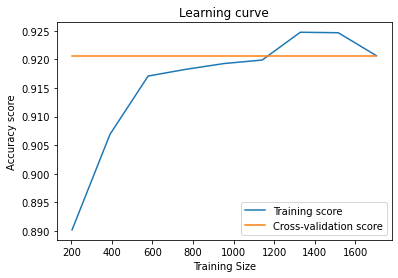

In [14]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Logistic Regression

In [15]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression(random_state=1)

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [16]:
# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.0001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}


/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.92065728        nan 0.92065728 0.92065728
 0.92065728 0.92065728 0.92065728 0.92065728        nan        nan
        nan        nan        nan 0.92065728 0.92065728        nan
 0.92065728 0.92065728        nan        nan 0.92065728        nan
 0.92065728 0.92065728 0.92065728 0.92065728 0.92065728 0.92065728
        nan        nan        nan        nan        nan 0.92065728
 0.92065728        nan 0.92065728 0.92065728        nan        nan
        nan        nan 0.92065728 0.92065728 0.92065728        nan
 0.92065728 0.92065728        nan        nan        nan        nan
        nan 0.92065728 0.92065728        nan 0.92065728 0.92065728
        nan        nan 0.92065728        nan 0.92065728 0.92065728
 0.92065728 0.92065728 0.92065728 0.92065728        nan        nan
        nan        n

In [17]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Accuracy: 0.9200438116100766
F1 score micro: 0.9200438116100766
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       840
           1       0.00      0.00      0.00        73

    accuracy                           0.92       913
   macro avg       0.46      0.50      0.48       913
weighted avg       0.85      0.92      0.88       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [  17  204  391  579  766  954 1141 1329 1516 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


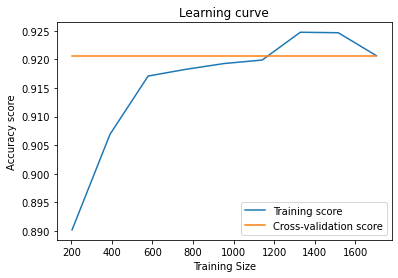

In [18]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## KNN

In [19]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=len(y_t.unique()))

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [20]:
# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'algorithm': 'auto', 'leaf_size': 23, 'weights': 'uniform'}


In [21]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Accuracy: 0.91894852135816
F1 score micro: 0.91894852135816
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       840
           1       0.00      0.00      0.00        73

    accuracy                           0.92       913
   macro avg       0.46      0.50      0.48       913
weighted avg       0.85      0.92      0.88       913



[learning_curve] Training set sizes: [  17  204  391  579  766  954 1141 1329 1516 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished


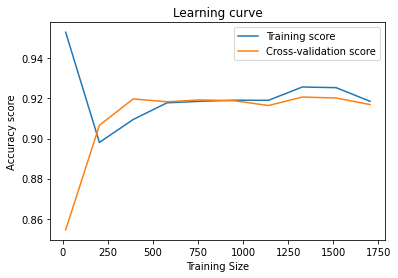

In [22]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=23, weights='uniform')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Random Forest

In [23]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier(random_state=1)

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [24]:
# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': False, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 26, 'n_estimators': 16}


In [25]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Accuracy: 0.91894852135816
F1 score micro: 0.91894852135816
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       840
           1       0.00      0.00      0.00        73

    accuracy                           0.92       913
   macro avg       0.46      0.50      0.48       913
weighted avg       0.85      0.92      0.88       913



[learning_curve] Training set sizes: [  17  204  391  579  766  954 1141 1329 1516 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


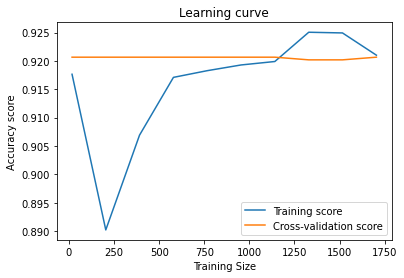

In [26]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=14, max_features='auto', min_samples_leaf=2, min_samples_split=26, n_estimators=16)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# Total Learning Curve

[learning_curve] Training set sizes: [  17  204  391  579  766  954 1141 1329 1516 1704]
[learning_curve] Training set sizes: [  17  204  391  579  766  954 1141 1329 1516 1704]
[learning_curve] Training set sizes: [  17  204  391  579  766  954 1141 1329 1516 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [  17  204  391  579  766  954 1141 1329 1516 1704]


[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


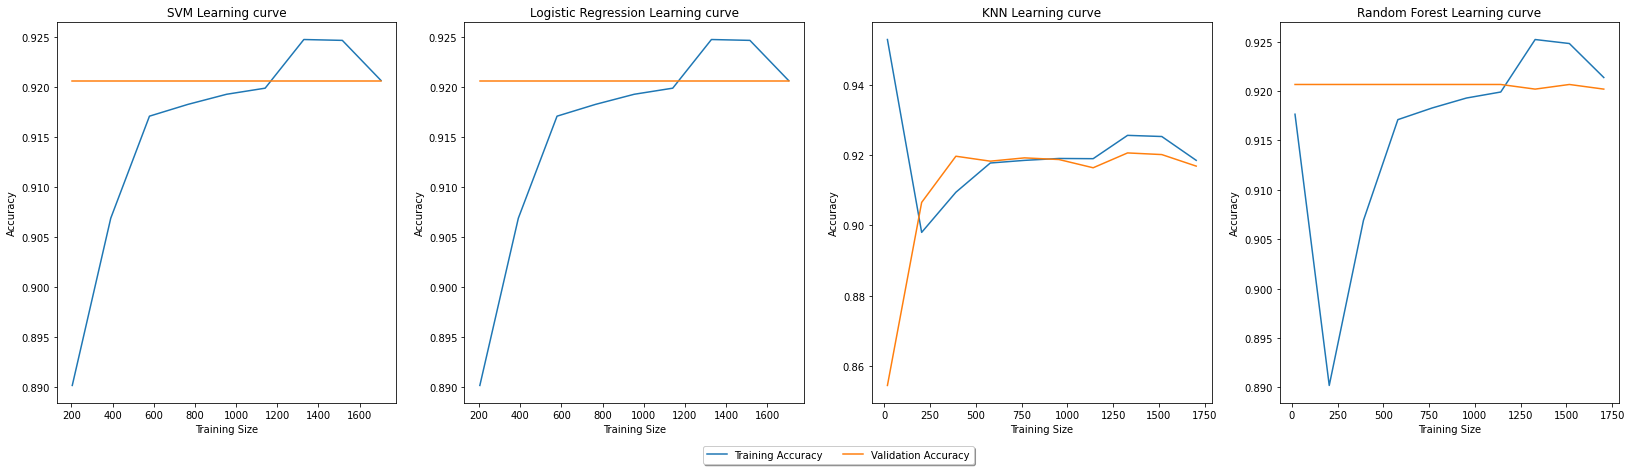

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(28, 7))

plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax1.plot(train_sizes, train_mean, label='Training Accuracy')
ax1.plot(train_sizes, val_mean, label='Validation Accuracy')
ax1.set_title('SVM Learning curve')
ax1.set_xlabel('Training Size')
ax1.set_ylabel('Accuracy')

# Logistic Regression
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax2.plot(train_sizes, train_mean, label='Training Accuracy')
ax2.plot(train_sizes, val_mean, label='Validation Accuracy')
ax2.set_title('Logistic Regression Learning curve')
ax2.set_xlabel('Training Size')
ax2.set_ylabel('Accuracy')


# KNN
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=23, weights='uniform')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax3.plot(train_sizes, train_mean, label='Training Accuracy')
ax3.plot(train_sizes, val_mean, label='Validation Accuracy')
ax3.set_title('KNN Learning curve')
ax3.set_xlabel('Training Size')
ax3.set_ylabel('Accuracy')

# Random Forest 
plot_model = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=14, max_features='auto', min_samples_leaf=2, min_samples_split=26, n_estimators=16)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax4.plot(train_sizes, train_mean, label='Training Accuracy')
ax4.plot(train_sizes, val_mean, label='Validation Accuracy')
ax4.set_title('Random Forest Learning curve')
ax4.set_xlabel('Training Size')
ax4.set_ylabel('Accuracy')
ax4.legend(loc='upper center', bbox_to_anchor=(-1.3, -0.1),
          fancybox=True, shadow=True, ncol=2)

# 2. sampled

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=1)  # 70% training and 30% test

# SVM 

In [29]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC(random_state=1)

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=2)      

In [30]:
# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}


In [31]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Accuracy: 0.4657534246575342
F1 score micro: 0.4657534246575342
F1 score binary: 0.6355140186915887

classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.47      1.00      0.64        68

    accuracy                           0.47       146
   macro avg       0.23      0.50      0.32       146
weighted avg       0.22      0.47      0.30       146



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [  2  32  62  91 121 151 180 210 240 270]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


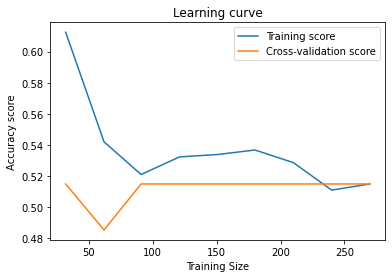

In [32]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# Logistic Regression

In [33]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression(random_state=1)

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [34]:
# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.0001, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}


/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.48516242        nan 0.51483758 0.51483758
 0.51483758 0.4761633  0.51483758 0.51483758        nan        nan
        nan        nan        nan 0.45851624 0.45851624        nan
 0.45851624 0.45851624        nan        nan 0.48516242        nan
 0.51483758 0.51483758 0.51483758 0.4761633  0.51483758 0.51483758
        nan        nan        nan        nan        nan 0.45851624
 0.45851624        nan 0.45851624 0.45851624        nan        nan
        nan        nan 0.52071993 0.51483758 0.51483758        nan
 0.51483758 0.51483758        nan        nan        nan        nan
        nan 0.45851624 0.45851624        nan 0.45851624 0.45851624
        nan        nan 0.48516242        nan 0.51483758 0.50588235
 0.50588235 0.47923617 0.50588235 0.50588235        nan        nan
        nan        n

In [35]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Accuracy: 0.5342465753424658
F1 score micro: 0.5342465753424658
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.70        78
           1       0.00      0.00      0.00        68

    accuracy                           0.53       146
   macro avg       0.27      0.50      0.35       146
weighted avg       0.29      0.53      0.37       146



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [  2  32  62  91 121 151 180 210 240 270]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


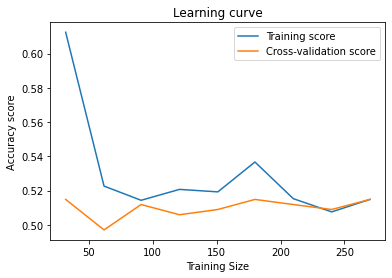

In [36]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.0001, multi_class='multinomial', penalty='l1', solver='saga')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# KNN

In [37]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=len(y_t.unique()))

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [38]:
# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'algorithm': 'ball_tree', 'leaf_size': 2, 'weights': 'distance'}


In [39]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Accuracy: 0.5
F1 score micro: 0.5
F1 score binary: 0.35398230088495575

classification report:
               precision    recall  f1-score   support

           0       0.52      0.68      0.59        78
           1       0.44      0.29      0.35        68

    accuracy                           0.50       146
   macro avg       0.48      0.49      0.47       146
weighted avg       0.49      0.50      0.48       146



[learning_curve] Training set sizes: [  2  32  62  91 121 151 180 210 240 270]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


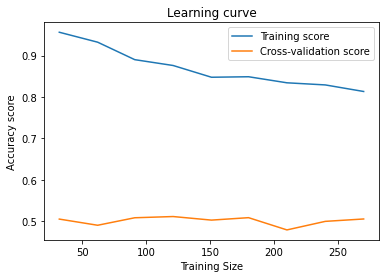

In [40]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, weights='distance')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# Random Forest

In [41]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier(random_state=1)

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [42]:
# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 26, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 5}


In [43]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Accuracy: 0.541095890410959
F1 score micro: 0.541095890410959
F1 score binary: 0.5562913907284768

classification report:
               precision    recall  f1-score   support

           0       0.59      0.47      0.52        78
           1       0.51      0.62      0.56        68

    accuracy                           0.54       146
   macro avg       0.55      0.55      0.54       146
weighted avg       0.55      0.54      0.54       146



[learning_curve] Training set sizes: [  2  32  62  91 121 151 180 210 240 270]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


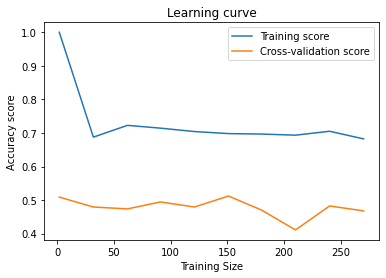

In [44]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=14, max_features='auto', min_samples_leaf=2, min_samples_split=26, n_estimators=16)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# Total Learning Curve

[learning_curve] Training set sizes: [  2  32  62  91 121 151 180 210 240 270]
[learning_curve] Training set sizes: [  2  32  62  91 121 151 180 210 240 270]
[learning_curve] Training set sizes: [  2  32  62  91 121 151 180 210 240 270]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [  2  32  62  91 121 151 180 210 240 270]


[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


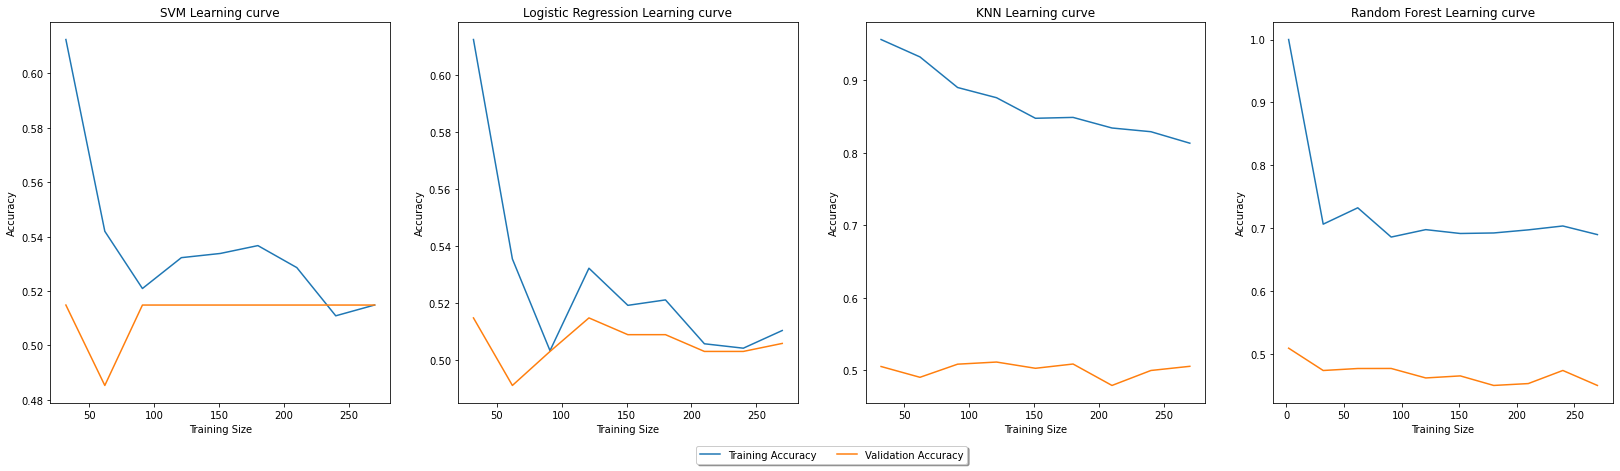

In [45]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(28, 7))

plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax1.plot(train_sizes, train_mean, label='Training Accuracy')
ax1.plot(train_sizes, val_mean, label='Validation Accuracy')
ax1.set_title('SVM Learning curve')
ax1.set_xlabel('Training Size')
ax1.set_ylabel('Accuracy')

# Logistic Regression
plot_model = LogisticRegression(C=0.0001, multi_class='multinomial', penalty='l1', solver='saga')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax2.plot(train_sizes, train_mean, label='Training Accuracy')
ax2.plot(train_sizes, val_mean, label='Validation Accuracy')
ax2.set_title('Logistic Regression Learning curve')
ax2.set_xlabel('Training Size')
ax2.set_ylabel('Accuracy')


# KNN
plot_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, weights='distance')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax3.plot(train_sizes, train_mean, label='Training Accuracy')
ax3.plot(train_sizes, val_mean, label='Validation Accuracy')
ax3.set_title('KNN Learning curve')
ax3.set_xlabel('Training Size')
ax3.set_ylabel('Accuracy')

# Random Forest 
plot_model = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=14, max_features='auto', min_samples_leaf=2, min_samples_split=26, n_estimators=16)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax4.plot(train_sizes, train_mean, label='Training Accuracy')
ax4.plot(train_sizes, val_mean, label='Validation Accuracy')
ax4.set_title('Random Forest Learning curve')
ax4.set_xlabel('Training Size')
ax4.set_ylabel('Accuracy')
ax4.legend(loc='upper center', bbox_to_anchor=(-1.3, -0.1),
          fancybox=True, shadow=True, ncol=2)